In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.DataFrame({
    "x" : [12,20,28,18,29,33,24,45,45,52,51,53,52,55,61,64,69,72],
    "y" : [39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7],
})

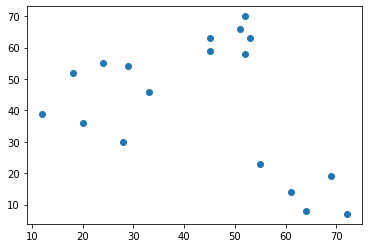

In [3]:
plt.scatter(df['x'], df['y'])

In [27]:
np.random.seed(200)
k  = 3
#centroid[i] = [x,y]
centroids = {
    i+1: [np.random.randint(0,80), np.random.randint(0,80)]
    for i in range(k)
}


In [26]:
for i in range (k):
    cen = {i+1: [np.random.randint(0,80), np.random.randint(0,80)]}

In [28]:
cen

{9: [48, 79]}

In [23]:
centroids

array([[64.2       , 14.2       ],
       [23.42857143, 44.57142857],
       [49.66666667, 63.16666667]])

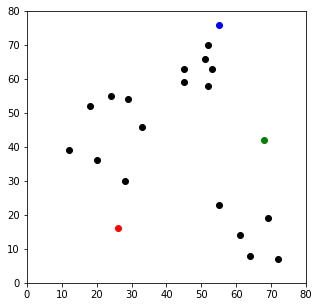

In [5]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color='k')
colmap = {1:'r', 2:'g', 3:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [7]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_
print('Labels -> {}\nCentroids -> {}'.format(labels, centroids))

Labels -> [1 1 1 1 1 1 1 2 2 2 2 2 2 0 0 0 0 0]
Centroids -> [[64.2        14.2       ]
 [23.42857143 44.57142857]
 [49.66666667 63.16666667]]


No handles with labels found to put in legend.


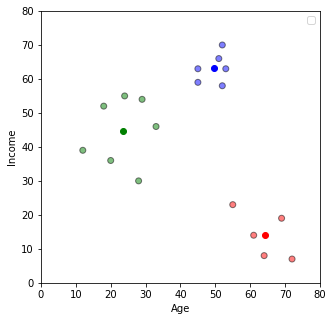

In [8]:
fig = plt.figure(figsize=(5,5))
colors = map(lambda x: colmap[x+1], labels)
colors1  = list(colors)

plt.scatter(df['x'],df['y'], color=colors1, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel("Age")
plt.ylabel("Income")
plt.xlim(0,80)
plt.ylim(0,80)
plt.legend()
plt.show()

### Find Elbow Method

In [18]:
k_rng = range(1,10)    # k_range is bassically no. of K is k = 1,2,3,4,5,6,7,8,9
sse =[]
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df)
    sse.append(km.inertia_)

In [19]:
sse

[13210.5,
 4764.5230769230775,
 1423.195238095238,
 880.5166666666667,
 677.9166666666667,
 544.4166666666667,
 432.16666666666663,
 346.99999999999994,
 249.33333333333331]

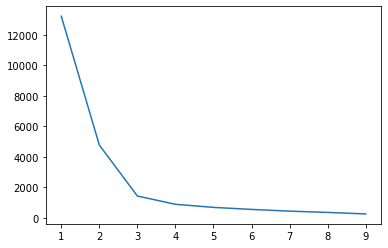

In [20]:
plt.plot(k_rng, sse)